In [27]:
from process import *
from calculate import *
from plots import *
from envelopes import *
from supports import *
from plotsettings import *

import numpy as np
import matplotlib.pyplot as plt

In [48]:
# TLS, single-tone
wd_red_larger = [1.2728, 1.2767, 1.2821, 1.2890, 1.2974, 1.3474, 1.4171, 1.5095]
shift_red_larger = [0.0455, 0.0533, 0.0641, 0.0780, 0.0948, 0.1948, 0.3342, 0.519]
wsb_red_larger = [0.0007435, 0.001667, 0.00294, 0.004549, 0.006461, 0.01697, 0.03080, 0.04578]
wd_blue_larger = [5.2716, 5.2781, 5.2887, 5.3032, 5.3224, 5.3452, 5.474, 5.6562, 5.8829]
shift_blue_larger = [0.0432, 0.0561, 0.0773, 0.1064, 0.1448, 0.1905, 0.448, 0.8124, 1.2658]
wsb_blue_larger = [0.0007608, 0.003019, 0.006727, 0.01183, 0.01815, 0.02563, 0.06447, 0.11186, 0.16296]
eps_larger = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.5, 0.7, 0.9]

wd_red_smaller = [1.2566, 1.2497, 1.2402, 1.2281, 1.2135, 1.1337, 1.0248, 0.8936]
shift_red_smaller = [-0.0131, 0.00056, 0.0196, 0.0438, 0.073, 0.2326, -0.4504, -0.7128]
wsb_red_smaller = [0.0004685, 0.00104, 0.001855, 0.00291, 0.004213, 0.01214, 0.02523, 0.04539]
wd_blue_smaller = [5.2312, 5.2227, 5.2108, 5.1956, 5.177, 5.0683, 4.9041, 4.6878]
shift_blue_smaller = [-0.0377, -0.0546, -0.0784, -0.1089, -0.146, -0.3634, -0.6918, -1.1244]
wsb_blue_smaller = [0.001896, 0.004239, 0.007476, 0.01156, 0.01644, 0.04267, 0.07652, 0.1171]
eps_smaller = [0.1, 0.15, 0.2, 0.25, 0.3, 0.5, 0.7, 0.9]

In [49]:
b, a, nq, nc = ops(2, 10)
Hc = 0.2*2*pi*(a + a.dag())*(b + b.dag())
eps_range = np.linspace(0.0, 0.52, 100)

wd_th_red_larger = list()
wd_th_blue_larger = list()
wd_th_red_smaller = list()
wd_th_blue_smaller = list()

for eps in eps_range:
    Hi = 6.5*2*pi*nq + 4.0*2*pi*nc
    wd_th_red_larger.append(drivefreq(2, 6.5*2*pi, 4.0*2*pi, Hi+Hc, 'red', 1, 
                                      eps=2*eps*2*pi, resolution=0.0001*2*pi, verbose=False)/2/pi)
    wd_th_blue_larger.append(drivefreq(2, 6.5*2*pi, 4.0*2*pi, Hi+Hc, 'blue', 1,
                                       eps=2*eps*2*pi, resolution=0.0001*2*pi, verbose=False)/2/pi)
    
    Hi = 4.0*2*pi*nq + 6.5*2*pi*nc
    wd_th_red_smaller.append(drivefreq(2, 4.0*2*pi, 6.5*2*pi, Hi+Hc, 'red', 1,
                                       eps=2*eps*2*pi, resolution=0.0001*2*pi, verbose=False)/2/pi)
    wd_th_blue_smaller.append(drivefreq(2, 4.0*2*pi, 6.5*2*pi, Hi+Hc, 'blue', 1,
                                        eps=2*eps*2*pi, resolution=0.0001*2*pi, verbose=False)/2/pi)

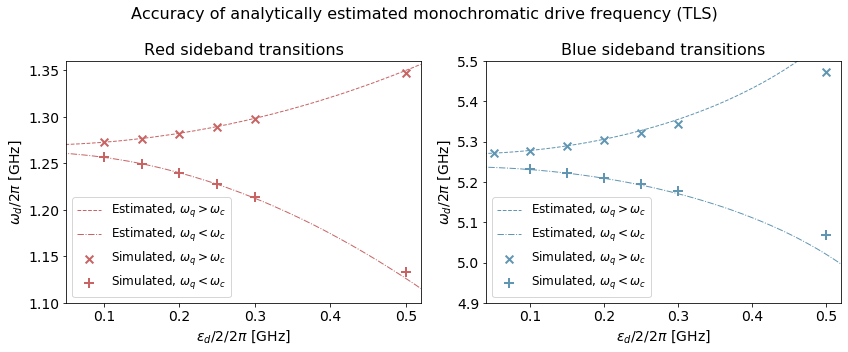

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Accuracy of analytically estimated monochromatic drive frequency (TLS)")

plt.subplot(1, 2, 1)
plt.scatter(eps_larger[1:], wd_red_larger, marker='x', lw=2, s=60, c=plotcolours['sbred'], label="Simulated, $\\omega_q > \\omega_c$")
plt.plot(eps_range, wd_th_red_larger, '--', c=plotcolours['sbred'], label="Estimated, $\\omega_q > \\omega_c$")
plt.scatter(eps_smaller, wd_red_smaller, marker='+', lw=2, s=100, c=plotcolours['sbred'], label="Simulated, $\\omega_q < \\omega_c$")
plt.plot(eps_range, wd_th_red_smaller, '-.', c=plotcolours['sbred'], label="Estimated, $\\omega_q < \\omega_c$")

plt.xlim([0.05, 0.52])
plt.ylim([1.10, 1.36])
plt.xlabel("$\\epsilon_d/2/2\\pi$ [GHz]")
plt.ylabel("$\\omega_d/2\\pi$ [GHz]")
plt.title("Red sideband transitions")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(eps_larger, wd_blue_larger, marker='x', lw=2, s=60, c=plotcolours['sbblue'], label="Simulated, $\\omega_q > \\omega_c$")
plt.plot(eps_range, wd_th_blue_larger, '--', c=plotcolours['sbblue'], label="Estimated, $\\omega_q > \\omega_c$")
plt.scatter(eps_smaller, wd_blue_smaller, marker='+', lw=2, s=100, c=plotcolours['sbblue'], label="Simulated, $\\omega_q < \\omega_c$")
plt.plot(eps_range, wd_th_blue_smaller, '-.', c=plotcolours['sbblue'], label="Estimated, $\\omega_q < \\omega_c$")
plt.xlim([0.04, 0.52])
plt.ylim([4.9, 5.5])
plt.xlabel("$\\epsilon_d/2/2\\pi$ [GHz]")
plt.ylabel("$\\omega_d/2\\pi$ [GHz]")
plt.title("Blue sideband transitions")
plt.legend()

plt.tight_layout()
fig.subplots_adjust(top=0.83)
plt.show()

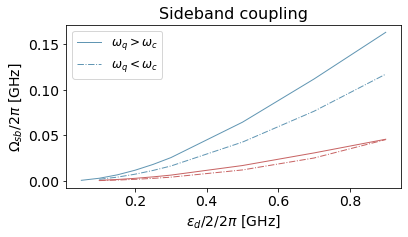

In [51]:
plt.figure(figsize=[6,3])
plt.subplot(1, 1, 1)
plt.plot(eps_larger[1:], wsb_red_larger, c=plotcolours['sbred'])
plt.plot(eps_larger, wsb_blue_larger, c=plotcolours['sbblue'], label='$\\omega_q > \\omega_c$')
plt.plot(eps_smaller, wsb_red_smaller, '-.', c=plotcolours['sbred'])
plt.plot(eps_smaller, wsb_blue_smaller, '-.', c=plotcolours['sbblue'], label='$\\omega_q < \\omega_c$')
# plt.scatter(eps_larger[1:], wsb_red_larger, marker='x', c=plotcolours['sbred'])
# plt.scatter(eps_larger, wsb_blue_larger, marker='x', c=plotcolours['sbblue'], label='$\\omega_q > \\omega_c$')
# plt.scatter(eps_smaller, wsb_red_smaller, marker='+', c=plotcolours['sbred'])
# plt.scatter(eps_smaller, wsb_blue_smaller, marker='+', c=plotcolours['sbblue'], label='$\\omega_q < \\omega_c$')
# plt.xlim([0, 0.52])
# plt.ylim([0, 0.07])
plt.xlabel("$\\epsilon_d/2/2\\pi$ [GHz]")
plt.ylabel("$\\Omega_{{sb}}/2\\pi$ [GHz]")
plt.title("Sideband coupling")
plt.legend()
plt.show()

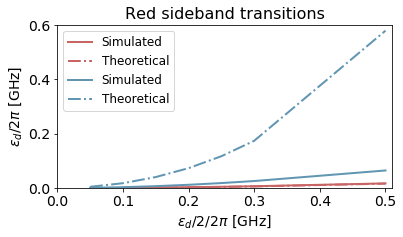

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
# fig.suptitle("TLS, single-tone drive, frequency deviation")

plt.subplot(1, 1, 1)
plt.plot(eps_larger[1:], wsb_red_larger, c=plotcolours['sbred'], alpha=alpha, label="Simulated")
plt.plot(eps_larger[1:], wsb_th_red_larger, '-.', c=plotcolours['sbred'], alpha=alpha, label="Theoretical")
plt.plot(eps_larger, wsb_blue_larger, c=plotcolours['sbblue'], alpha=alpha, label="Simulated")
plt.plot(eps_larger, wsb_th_blue_larger, '-.', c=plotcolours['sbblue'], alpha=alpha, label="Theoretical")
plt.xlim([0, 0.51])
plt.ylim([0, 0.6])
plt.xlabel("$\\epsilon_d/2/2\\pi$ [GHz]")
plt.ylabel("$\\epsilon_d/2\\pi$ [GHz]")
# plt.title("$\\omega_q > \\omega_c$")
plt.title("Red sideband transitions")
plt.legend()
plt.show()

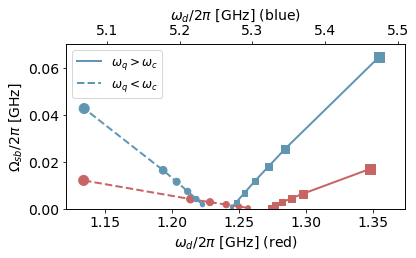

In [4]:
fig, axes = plt.subplots(1, 1, figsize=(6, 4))
# fig.suptitle("TLS, single-tone drive")

ax1 = plt.subplot(1, 1, 1)
ax1.scatter(wd_red_larger, wsb_red_larger, marker='s', c=plotcolours['sbred'], s=200*np.asarray(eps_larger[1:]))
ax1.scatter(wd_red_smaller, wsb_red_smaller, marker='o', c=plotcolours['sbred'], s=200*np.asarray(eps_smaller))
ax1.plot(wd_red_larger, wsb_red_larger, c=plotcolours['sbred'])
ax1.plot(wd_red_smaller, wsb_red_smaller, '--', c=plotcolours['sbred'])
ax1.set_xlabel("$\\omega_d/2\\pi$ [GHz] (red)")
ax1.set_ylim([0, 0.07])
ax2 = ax1.twiny()
ax2.scatter(wd_blue_larger, wsb_blue_larger, marker='s', c=plotcolours['sbblue'], s=200*np.asarray(eps_larger))
ax2.scatter(wd_blue_smaller, wsb_blue_smaller, marker='o', c=plotcolours['sbblue'], s=200*np.asarray(eps_smaller))
ax2.plot(wd_blue_larger, wsb_blue_larger, c=plotcolours['sbblue'], label='$\\omega_q > \\omega_c$')
ax2.plot(wd_blue_smaller, wsb_blue_smaller, '--', c=plotcolours['sbblue'], label='$\\omega_q < \\omega_c$')
ax2.set_xlabel("$\\omega_d/2\\pi$ [GHz] (blue)")
ax2.tick_params(axis='x')
ax1.set_ylabel("$\\eps_{{sb}}/2\\pi$ [GHz]")
plt.legend()

plt.tight_layout()
fig.subplots_adjust(top=0.77)
plt.show()